In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

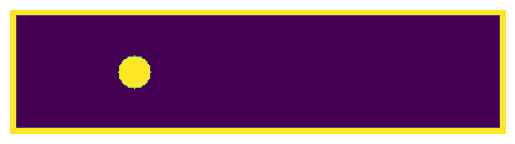

In [28]:
Nx = 400 # How many cells in x axis
Ny = 100 # How many cells in y axis

tau = 0.53 # Time scale
Nt = 3000 # TIme steps

# lattice speeds and weights
NL = 9 # 9 differentt velocities
cxs = np.array([0, 0, 1, 1, 1, 0, -1, -1, -1])
cys = np.array([0, 1, 1, 0, -1, -1, -1, 0, 1])
weights = np.array([4/9 , 1/9, 1/36, 1/9, 1/36, 1/9, 1/36, 1/9, 1/36])

# Initial Condition
F = np.ones((Ny, Nx, NL)) + (0.1 * np.random.randn(Ny, Nx, NL))
F[:, :, 3] = 2.3 # Every right node gets a nudge to the right 

cylinder = np.full((Ny, Nx), False) # False = NOT a Boundary, True = IS a Boundary
cylinder_radius = 13

# Defining Obsticle
for x in range(Nx):
    for y in range(Ny):
        if distance(Nx//4, Ny//2, x, y) <= cylinder_radius:
            cylinder[y][x] = True 
cylinder[95:] = True
cylinder[:5] = True
cylinder[:, :5] = True
cylinder[:, 395:] = True

plt.axis("off")
plt.imshow(cylinder)
plt.show()


In [ ]:
cylinder[5:].shape

(400,)

In [ ]:
plot_every = 50

for it in range(Nt):
    for i, cx, cy in zip(range(NL), cxs, cys):
        F[:, :, i] = np.roll(F[:, :, i], cx, axis = 1)
        F[:, :, i] = np.roll(F[:, :, i], cx, axis = 0)
    BoundaryF = F[cylinder, :]
    BoundaryF[:, [0, 5, 6, 7, 8, 1, 2, 3, 4]] # If particles are inside the Boundary, then make them go Opposite Direction

    # Fluid Variables
    rho = np.sum(F, axis = -1) # Density
    momentumx = np.sum(F * cxs, axis = -1) / rho
    momentumy = np.sum(F * cys, axis = -1) / rho

    F[cylinder, :] = BoundaryF
    momentumx[cylinder], momentumy[cylinder] = 0, 0

    # Collision
    Feq = np.zeros(F.shape)
    for i, cx, cy, w in zip(range(NL), cxs, cys, weights):
        Feq[:, :, i] = rho * w * (
            1 + 3 * (cx * momentumx + cy * momentumy) + 9 * (cx * momentumx + cy * momentumy)**2 / 2 - 3 * (momentumx ** 2 + momentumy ** 2) / 2
                              )
    F = F + -(1/tau) * (F-Feq)

    if it % plot_every == 0:
        plt.imshow(np.sqrt(momentumx ** 2 + momentumy ** 2))


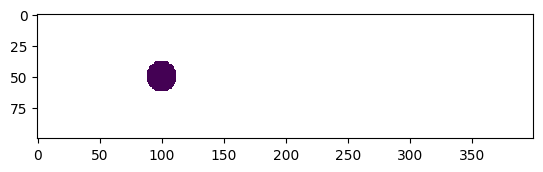

In [20]:
plt.imshow(np.sqrt(momentumx ** 2 + momentumy ** 2))

In [91]:
BoundaryF = F[cylinder, :]
BoundaryF[0, [0, 5, 6, 7, 8, 1, 2, 3, 4]]

array([0.91554726, 0.89441895, 1.10001773, 1.06966805, 0.86990164,
       0.93387722, 0.97666931, 2.3       , 0.95511099])

In [59]:
F[:, :, 0]

array([[0.99555423, 1.04926754, 0.9152987 , ..., 1.06617757, 0.92233977,
        0.8981102 ],
       [0.96241673, 0.91956879, 1.00728961, ..., 0.97498824, 0.90228761,
        0.95988792],
       [0.98948984, 0.8934224 , 1.01778643, ..., 0.91140218, 1.20278522,
        1.02350535],
       ...,
       [0.81487632, 1.02847452, 0.93400655, ..., 1.02459423, 0.86351719,
        0.91022434],
       [0.91396188, 0.95150315, 0.9681389 , ..., 1.04435834, 0.91579719,
        1.08638205],
       [0.94178091, 1.14421717, 1.0271985 , ..., 0.75382468, 0.88274953,
        1.00930585]])

In [45]:
np.roll(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), 1, axis = 1)

array([[3, 1, 2],
       [6, 4, 5],
       [9, 7, 8]])

In [33]:
np.full((2,3,4), 2).shape

(2, 3, 4)